In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('продажи_2023_со_всеми_характеристиками.csv', encoding='utf-8', sep=',', low_memory=False)
pd.set_option('display.max_columns', None)
df.head(5)

,uid,name,category1_name,category2_name,category3_name,category4_name,brand_name,color,size,quantity,uid_doc,customer_key,discount_sum,total_sum,prod_unit_price,date_time_0,fill_power,r_value,baro,wireless_en,back_pocket,vent_back,vent_zip,vent_helmet,activity_type,rope_type,carab_lock_type,sling_type,warming_type,waterproof_back,sleep_bag_person,inner_short,sl_bag_collar,cloth_collar,gps,bag_valve,heart_monitor,outer_battery,height,boot_height,inner_tent_height,rub_boot_height,mat_compact_size,outer_size,tent_outer_size,water_resist,hydro_compl,depth,food_ready,breast_lock,rope_diameter,rope_length,pants_lenght,socks_lenght,sl_bag_length,sl_bag_height,bp_access,boot_rigid,back_pocket_2access,closed_toe,uf_filter,battery_type,hood,waist_pocket,shirt_pocket,bottle_pockets,filter_cat,entry_num,person_num,buckles_num,layers_num,vestibule_num,compression,sandals_const,boot_const,pants_const,hammock_const,stove_const,tent_const,helmet_const,bottle_fast,iceaxe_fast,poles_fast,helmet_fast,pants_cut,pant_boot_hook,bag_hook,main_axe_load,material_textile,poles_material,carabiner_material,membraine_type,pole_fold_type,zip,shin_zip,mosq_mesh,bottles_compl,carbide_tip,membraine,carab_lock,cape_compl,impregn,piezo,low_comf_temp,volume,surface_boot,gender,waist_belt,m_or_bay,pronation,noteb_pock_size,boot_ewlt,real_weight,back_size_modif,belt_pants,season,lacing_sys,country_origine,skeleton_remove,valve_remove,belt_remove,protect_techno,furniture_type,knife_type,scarf_type,electro_type,ballon_type,dish_type,fuel_type,carabin_type,mat_type,zip_type,boot_type,harness_type,type_of_good,stitch_type,insulation,mat_shape,sl_bag_shape,color_filter,width,sl_b_leg_width,sl_b_should_width
0,1906ff08-ddf8-11ed-85da-b42e99c9b482,Накидка на рюкзак Bach Ripstop Raincover Black,Рюкзаки,Аксессуары для рюкзаков,NaN,NaN,Bach,Black,M,1.0,6e5d358b-4333-11ee-811f-002590d0f723,201650ec-3234-11e6-80e4-002590d0f723,748.0,2242.0,2990.0,2023-08-25 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,07",NaN,NaN,23-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Накидка на рюкзак,NaN,NaN,NaN,NaN,чёрный/,NaN,NaN,NaN
1,1906ff08-ddf8-11ed-85da-b42e99c9b482,Накидка на рюкзак Bach Ripstop Raincover Black,Рюкзаки,Аксессуары для рюкзаков,NaN,NaN,Bach,Black,S,1.0,6e5d358b-4333-11ee-811f-002590d0f723,201650ec-3234-11e6-80e4-002590d0f723,748.0,2242.0,2990.0,2023-08-25 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,07",NaN,NaN,23-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Накидка на рюкзак,NaN,NaN,NaN,NaN,чёрный/,NaN,NaN,NaN
2,1906ff08-ddf8-11ed-85da-b42e99c9b482,Накидка на рюкзак Bach Ripstop Raincover Black,Рюкзаки,Аксессуары для рюкзаков,NaN,NaN,Bach,Black,XL,1.0,6e5d358b-4333-11ee-811f-002590d0f723,201650ec-3234-11e6-80e4-002590d0f723,748.0,2242.0,2990.0,2023-08-25 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,07",NaN,NaN,23-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
numcols = ['height', 'depth', 'r_value', 'rope_diameter', 'main_axe_load', 'volume', 'real_weight', 'width']
for col in numcols:
    df[col].fillna(0, inplace = True) # не работает не знаю, почему
    df[col] = df[col].str.replace(',', '.').astype(float)

In [4]:
df['depth'] = df['depth'].fillna(0)
df['inner_tent_height'] = df['inner_tent_height'].fillna(0)
df['height'] = df['height'].fillna(0)
df['r_value'] = df['r_value'].fillna(0)
df['rope_diameter'] = df['rope_diameter'].fillna(0)
df['sl_bag_length'] = df['sl_bag_length'].fillna(0)
df['sl_bag_height'] = df['sl_bag_height'].fillna(0)
df['main_axe_load'] = df['main_axe_load'].fillna(0)
df['volume'] = df['volume'].fillna(0)
df['real_weight'] = df['real_weight'].fillna(0)
df['width'] = df['width'].fillna(0)
df['sl_b_leg_width'] = df['sl_b_leg_width'].fillna(0)
df['sl_b_should_width'] = df['sl_b_should_width'].fillna(0)

In [5]:
getdfeatures = ['fill_power','vent_back', 'vent_zip', 'vent_helmet', 'rope_type', 'sling_type', 'warming_type', 'waterproof_back', 'sleep_bag_person', 'inner_short', 'cloth_collar', 'boot_height', 'rub_boot_height',
                'water_resist', 'hydro_compl', 'food_ready', 'breast_lock', 'rope_length', 'pants_lenght', 'socks_lenght', 'boot_rigid', 'back_pocket_2access', 
                'closed_toe', 'hood', 'waist_pocket','bottle_pockets', 'filter_cat', 'entry_num', 'person_num', 'buckles_num', 'layers_num', 'vestibule_num', 
                'compression', 'sandals_const', 'boot_const', 'pants_const', 'hammock_const', 'stove_const', 'tent_const', 'helmet_const', 'bottle_fast', 
                'iceaxe_fast', 'poles_fast', 'helmet_fast', 'pants_cut', 'pant_boot_hook', 'bag_hook', 'poles_material', 'carabiner_material', 'membraine_type',
               'pole_fold_type', 'zip', 'shin_zip', 'mosq_mesh', 'bottles_compl', 'carbide_tip', 'membraine', 'carab_lock', 'cape_compl', 'impregn', 'piezo', 'surface_boot', 
               'gender', 'waist_belt', 'm_or_bay', 'pronation', 'noteb_pock_size', 'boot_ewlt', 'back_size_modif', 'belt_pants', 'season', 'lacing_sys', 'skeleton_remove',
               'valve_remove', 'belt_remove', 'protect_techno', 'furniture_type', 'knife_type', 'scarf_type', 'electro_type', 'ballon_type', 'dish_type', 'carabin_type',
               'mat_type', 'zip_type', 'stitch_type', 'insulation', 'mat_shape', 'sl_bag_shape']
              
                
for col in getdfeatures:
    df[col] = df[col].fillna(0)
df1 = pd.get_dummies(df, columns=getdfeatures)

In [6]:
#df1.info(verbose = True, show_counts = True)

In [7]:
df2_full = df1.iloc[:,[1,12,13,14,16,27,28,32,33,34,35,40,43,44]]
df2_data = df1.iloc[:,[12,13,14,16,27,28,32,33,34,35,40,43,44]]
df2_data.head(5)

,discount_sum,total_sum,prod_unit_price,r_value,height,inner_tent_height,depth,rope_diameter,sl_bag_length,sl_bag_height,main_axe_load,volume,real_weight
0,748.0,2242.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
1,748.0,2242.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
2,748.0,2242.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
3,748.0,2242.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07
4,6780.0,20340.0,27120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.77


In [8]:
df3 = df1.iloc[:,51:479]
df3.head(5)

,width,sl_b_leg_width,sl_b_should_width,fill_power_0,fill_power_1 000,fill_power_550,fill_power_600,fill_power_650,fill_power_700,fill_power_750,fill_power_800,fill_power_850,fill_power_900,vent_back_0,vent_back_Да,vent_back_Нет,vent_zip_0,vent_zip_Без вентиляционных молний,vent_zip_На бёдрах,vent_zip_На бёдрах и голенях,vent_zip_От бедра до низа брючин,vent_zip_От коленей до низа брючин,vent_zip_От талии до низа брючин,vent_zip_Под рукавами,vent_helmet_0,vent_helmet_Активная вентиляция,vent_helmet_Пассивная вентиляция,rope_type_0,rope_type_Динамика,rope_type_Паракорд,rope_type_Репшнур,rope_type_Статика,rope_type_Стропа,sling_type_0,sling_type_Оттяжки с карабинами,sling_type_Петли и оттяжки,warming_type_0,warming_type_Комбинированный,warming_type_Пух,warming_type_Синтетический,warming_type_Хлопок,waterproof_back_0,waterproof_back_Да,waterproof_back_Нет,sleep_bag_person_0,sleep_bag_person_Двухместный,sleep_bag_person_Одноместный,inner_short_0,inner_short_Нет,inner_short_Тайтсы (с компрессией),inner_short_Трусы,inner_short_Шорты (без компрессии),inner_short_Шорты (с компрессией),cloth_collar_0,cloth_collar_V-образный,cloth_collar_Высокий,cloth_collar_Круглый,boot_height_0,boot_height_Высокий,boot_height_Низкий,boot_height_Средний,rub_boot_height_0,rub_boot_height_Высокие,rub_boot_height_Средние,water_resist_0,water_resist_Да,water_resist_Нет,hydro_compl_0,hydro_compl_Да,hydro_compl_Нет,food_ready_0,food_ready_Готовое,food_ready_Залить кипятком,breast_lock_0,breast_lock_Есть,breast_lock_Нет,rope_length_0.0,rope_length_1.0,rope_length_10.0,rope_length_25.0,rope_length_30.0,rope_length_50.0,rope_length_60.0,pants_lenght_0,pants_lenght_Long,pants_lenght_Regular,pants_lenght_Short,pants_lenght_Длинные,pants_lenght_Кальсоны 3/4,pants_lenght_Укороченные,socks_lenght_0,socks_lenght_Высокие,socks_lenght_Гольфы,socks_lenght_Низкие,socks_lenght_Средние,boot_rigid_0,boot_rigid_Высокая жёсткость,boot_rigid_Низкая жёсткость,boot_rigid_Средняя жёсткость,back_pocket_2access_0,back_pocket_2access_Да,back_pocket_2access_Нет,closed_toe_0,closed_toe_Да,closed_toe_Нет,hood_0,hood_Без капюшона,hood_С капюшоном,waist_pocket_0,waist_pocket_Да,waist_pocket_Нет,bottle_pockets_0,bottle_pockets_Да,bottle_pockets_Нет,filter_cat_0,filter_cat_S0,filter_cat_S1,filter_cat_S2,filter_cat_S3,filter_cat_S3+,filter_cat_S4,filter_cat_Фотохром 0-2,filter_cat_Фотохром 0-3,filter_cat_Фотохром 1-2,filter_cat_Фотохром 1-3,filter_cat_Фотохром 2-3,filter_cat_Фотохром 2-4,entry_num_0.0,entry_num_1.0,entry_num_2.0,entry_num_3.0,person_num_0.0,person_num_1.0,person_num_2.0,person_num_3.0,person_num_4.0,person_num_5.0,person_num_6.0,person_num_8.0,person_num_10.0,buckles_num_0,buckles_num_2,buckles_num_3,buckles_num_4 и более,layers_num_0.0,layers_num_2.0,layers_num_2.5,layers_num_3.0,vestibule_num_0,vestibule_num_0,vestibule_num_1,vestibule_num_2,vestibule_num_Без тамбура,compression_0,compression_Без компрессии,compression_С компрессией,sandals_const_0,sandals_const_Сабо,sandals_const_Сандалии,boot_const_0,boot_const_Двойные,boot_const_Одинарные,pants_const_0,pants_const_Брюки_классические/,pants_const_Превращаются_в_шорты/,pants_const_Самосбросы/,hammock_const_0,hammock_const_Для снаряжения,hammock_const_Классический,hammock_const_Мостовой,stove_const_0,stove_const_горелки без шланга,stove_const_горелки со шлангом,stove_const_системы приготовления,tent_const_0,tent_const_Для гамака,tent_const_Классический,tent_const_Шатёр,helmet_const_0,helmet_const_Hard Shell,helmet_const_Hybrid,helmet_const_In-Mold,bottle_fast_0,bottle_fast_Без крепления для бутылки,bottle_fast_Гидратор в комплекте,bottle_fast_Карман для бутылки,iceaxe_fast_0,iceaxe_fast_да,iceaxe_fast_нет,poles_fast_0,poles_fast_да,poles_fast_нет,helmet_fast_0,helmet_fast_да,helmet_fast_нет,pants_cut_0,pants_cut_Облегающий,pants_cut_Свободный,pant_boot_hook_0,pant_boot_hook_Есть,pant_boot_hook_Нет,bag_hook_0,bag_hook_Есть,bag_hook_Нет,poles_material_0,poles_material_Алюминий,poles_material_Карбон,poles_material_Композит,p

In [9]:
#df3.info(verbose = True, show_counts = True)

In [10]:
# вариант с суммой, скидкой и ценами
df_toteach = pd.concat([df2_data,df3], axis=1)
df_tocheck = pd.concat([df2_full,df3], axis=1)
#df_testtoteach.info(verbose = True, show_counts = True)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_dm0 = scaler.fit_transform(df_toteach)

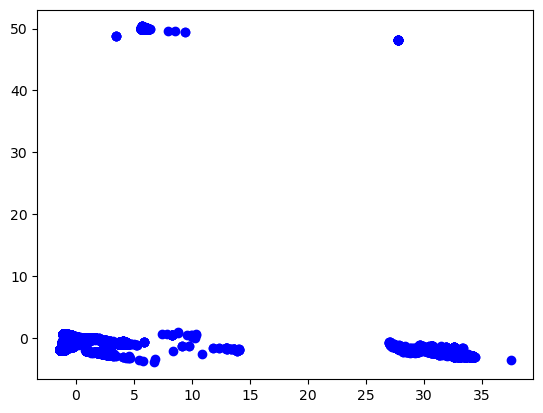

In [12]:
#0 PCA, 2 компоненты, standartscaler, датасет со всеми суммами и ценами
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled_dm0)
X_PCA0 = pca.transform(X_scaled_dm0)
plt.plot(X_PCA0[:,0], X_PCA0[:,1],'bo')

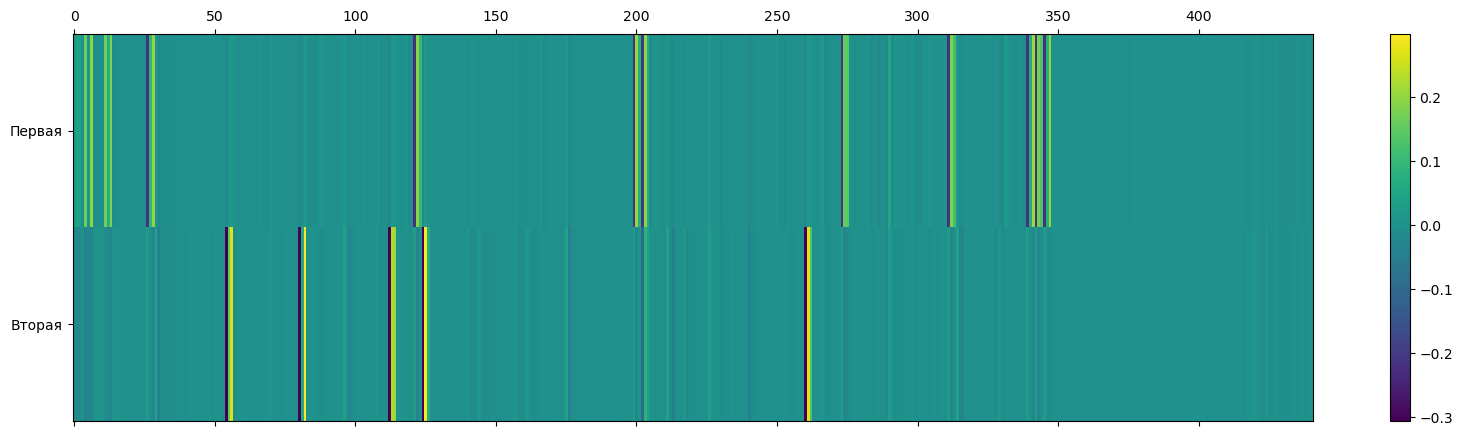

In [13]:
from matplotlib import colormaps
plt.figure(figsize = (20,5))
plt.matshow(pca.components_, cmap = 'viridis', fignum = 1, aspect = 'auto')
plt.yticks([0,1], ['Первая', 'Вторая'])
plt.colorbar()
#plt.xticks(range(len(X_scaled_dm0.feature_names)), X_scaled_dm0.feature_names, rotation = 60, ha = 'left')
#plt.xlabel("Характеристика")
#plt.ylabel("Главные компоненты")

In [14]:
print("компоненты  PCA:\n{}".format(pca.components_))

компоненты  PCA:
[[ 2.94348484e-02  4.39678924e-02  4.33724994e-02 -2.89455219e-03
   1.60784365e-01  7.66824336e-03  1.95509512e-01 -2.72924886e-03
  -4.22278111e-03 -4.12089224e-03 -2.86061071e-03  1.67479771e-01
   7.05000143e-02  1.84698416e-01 -4.22715673e-03 -4.60657542e-03
   4.30103713e-03 -9.97324753e-05 -4.78376812e-04 -5.88834862e-04
  -1.32298477e-03 -1.65665488e-03 -9.69287076e-04 -1.93570515e-03
  -2.30645160e-03 -1.81134035e-03 -2.18279069e-01  9.31113716e-02
   1.96708824e-01  1.69421823e-02 -1.47250916e-02 -3.42260523e-03
  -1.46935709e-03 -2.43724781e-03 -3.84407299e-03 -3.01767356e-03
  -4.61276482e-03  9.31432969e-04 -3.16211227e-04 -8.84293347e-04
   3.61893329e-03 -1.02300554e-03 -2.08729861e-03 -2.66787151e-03
  -7.06355496e-04 -2.28317404e-04  8.08423108e-04 -2.53001603e-04
  -7.69021960e-04  4.27010981e-03 -4.94116579e-04 -2.58469916e-03
  -3.13392232e-03 -1.18450921e-03 -2.08067057e-02  9.02251447e-03
   1.87845489e-02  6.53439968e-03 -1.50565449e-03 -6.343541

In [15]:
pca3 = PCA(n_components = 3)
pca3.fit(X_scaled_dm0)
X_PCA = pca3.transform(X_scaled_dm0)

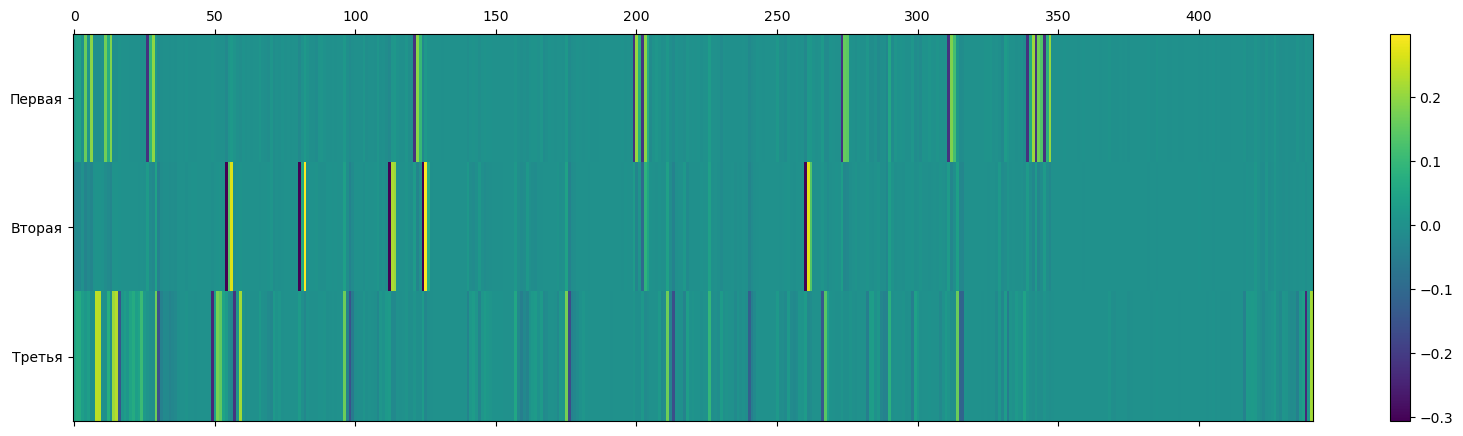

In [16]:
from matplotlib import colormaps
plt.figure(figsize = (20,5))
plt.matshow(pca3.components_, cmap = 'viridis', fignum = 1, aspect = 'auto')
plt.yticks([0,1,2], ['Первая', 'Вторая','Третья'])
plt.colorbar()

In [17]:
#  трехмерное не пашет ((
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (7,5))
#plt.clf()
ax = Axes3D(fig) #, rect = [0, 0, .95, 1], elev = 48, azim = 134)
plt.show()
#plt.cla()
ax.scatter(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], s = 1, color = 'g')

<Figure size 700x500 with 0 Axes>

In [18]:
ax_3d = fig.add_subplot(projection = '3d')

In [19]:
# Пример про лица из книги. Берем выделяем компоненты сначала, потом делаем кластеризацию DBSCAN
from sklearn.decomposition import PCA
pcadbs = PCA(n_components = 50, whiten = True, random_state = 0)
pcadbs.fit_transform(X_scaled_dm0)
X_pcadbs = pcadbs.transform(X_scaled_dm0)

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.2, min_samples = 50)
labels = dbscan.fit_predict(X_pcadbs)
print("Уникальные метки: {}".format(np.unique(labels)))
print("размеры кластеров: {}".format(np.bincount(labels+1))) 

Уникальные метки: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 

In [21]:
df_tocheck['clusters'] = labels
df_tocheck.head(5)

,name,discount_sum,total_sum,prod_unit_price,r_value,height,inner_tent_height,depth,rope_diameter,sl_bag_length,sl_bag_height,main_axe_load,volume,real_weight,width,sl_b_leg_width,sl_b_should_width,fill_power_0,fill_power_1 000,fill_power_550,fill_power_600,fill_power_650,fill_power_700,fill_power_750,fill_power_800,fill_power_850,fill_power_900,vent_back_0,vent_back_Да,vent_back_Нет,vent_zip_0,vent_zip_Без вентиляционных молний,vent_zip_На бёдрах,vent_zip_На бёдрах и голенях,vent_zip_От бедра до низа брючин,vent_zip_От коленей до низа брючин,vent_zip_От талии до низа брючин,vent_zip_Под рукавами,vent_helmet_0,vent_helmet_Активная вентиляция,vent_helmet_Пассивная вентиляция,rope_type_0,rope_type_Динамика,rope_type_Паракорд,rope_type_Репшнур,rope_type_Статика,rope_type_Стропа,sling_type_0,sling_type_Оттяжки с карабинами,sling_type_Петли и оттяжки,warming_type_0,warming_type_Комбинированный,warming_type_Пух,warming_type_Синтетический,warming_type_Хлопок,waterproof_back_0,waterproof_back_Да,waterproof_back_Нет,sleep_bag_person_0,sleep_bag_person_Двухместный,sleep_bag_person_Одноместный,inner_short_0,inner_short_Нет,inner_short_Тайтсы (с компрессией),inner_short_Трусы,inner_short_Шорты (без компрессии),inner_short_Шорты (с компрессией),cloth_collar_0,cloth_collar_V-образный,cloth_collar_Высокий,cloth_collar_Круглый,boot_height_0,boot_height_Высокий,boot_height_Низкий,boot_height_Средний,rub_boot_height_0,rub_boot_height_Высокие,rub_boot_height_Средние,water_resist_0,water_resist_Да,water_resist_Нет,hydro_compl_0,hydro_compl_Да,hydro_compl_Нет,food_ready_0,food_ready_Готовое,food_ready_Залить кипятком,breast_lock_0,breast_lock_Есть,breast_lock_Нет,rope_length_0.0,rope_length_1.0,rope_length_10.0,rope_length_25.0,rope_length_30.0,rope_length_50.0,rope_length_60.0,pants_lenght_0,pants_lenght_Long,pants_lenght_Regular,pants_lenght_Short,pants_lenght_Длинные,pants_lenght_Кальсоны 3/4,pants_lenght_Укороченные,socks_lenght_0,socks_lenght_Высокие,socks_lenght_Гольфы,socks_lenght_Низкие,socks_lenght_Средние,boot_rigid_0,boot_rigid_Высокая жёсткость,boot_rigid_Низкая жёсткость,boot_rigid_Средняя жёсткость,back_pocket_2access_0,back_pocket_2access_Да,back_pocket_2access_Нет,closed_toe_0,closed_toe_Да,closed_toe_Нет,hood_0,hood_Без капюшона,hood_С капюшоном,waist_pocket_0,waist_pocket_Да,waist_pocket_Нет,bottle_pockets_0,bottle_pockets_Да,bottle_pockets_Нет,filter_cat_0,filter_cat_S0,filter_cat_S1,filter_cat_S2,filter_cat_S3,filter_cat_S3+,filter_cat_S4,filter_cat_Фотохром 0-2,filter_cat_Фотохром 0-3,filter_cat_Фотохром 1-2,filter_cat_Фотохром 1-3,filter_cat_Фотохром 2-3,filter_cat_Фотохром 2-4,entry_num_0.0,entry_num_1.0,entry_num_2.0,entry_num_3.0,person_num_0.0,person_num_1.0,person_num_2.0,person_num_3.0,person_num_4.0,person_num_5.0,person_num_6.0,person_num_8.0,person_num_10.0,buckles_num_0,buckles_num_2,buckles_num_3,buckles_num_4 и более,layers_num_0.0,layers_num_2.0,layers_num_2.5,layers_num_3.0,vestibule_num_0,vestibule_num_0,vestibule_num_1,vestibule_num_2,vestibule_num_Без тамбура,compression_0,compression_Без компрессии,compression_С компрессией,sandals_const_0,sandals_const_Сабо,sandals_const_Сандалии,boot_const_0,boot_const_Двойные,boot_const_Одинарные,pants_const_0,pants_const_Брюки_классические/,pants_const_Превращаются_в_шорты/,pants_const_Самосбросы/,hammock_const_0,hammock_const_Для снаряжения,hammock_const_Классический,hammock_const_Мостовой,stove_const_0,stove_const_горелки без шланга,stove_const_горелки со шлангом,stove_const_системы приготовления,tent_const_0,tent_const_Для гамака,tent_const_Классический,tent_const_Шатёр,helmet_const_0,helmet_const_Hard Shell,helmet_const_Hybrid,helmet_const_In-Mold,bottle_fast_0,bottle_fast_Без крепления для бутылки,bottle_fast_Гидратор в комплекте,bottle_fast_Карман для бутылки,iceaxe_fast_0,iceaxe_fast_да,iceaxe_fast_нет,poles_fast_0,poles_fast_да,poles_fast_нет,helmet_fast_0,helmet_fast_да,helmet_fast_нет,pants_cut_0,pants_cut_Облегающий,pants_cut_Свободный,pant_boot_hook_0,pant_bo

In [28]:
df_inside_cluster = df_tocheck.loc[(df_tocheck['clusters'] == 10)]
df_inside_cluster.head(20)


,name,discount_sum,total_sum,prod_unit_price,r_value,height,inner_tent_height,depth,rope_diameter,sl_bag_length,sl_bag_height,main_axe_load,volume,real_weight,width,sl_b_leg_width,sl_b_should_width,fill_power_0,fill_power_1 000,fill_power_550,fill_power_600,fill_power_650,fill_power_700,fill_power_750,fill_power_800,fill_power_850,fill_power_900,vent_back_0,vent_back_Да,vent_back_Нет,vent_zip_0,vent_zip_Без вентиляционных молний,vent_zip_На бёдрах,vent_zip_На бёдрах и голенях,vent_zip_От бедра до низа брючин,vent_zip_От коленей до низа брючин,vent_zip_От талии до низа брючин,vent_zip_Под рукавами,vent_helmet_0,vent_helmet_Активная вентиляция,vent_helmet_Пассивная вентиляция,rope_type_0,rope_type_Динамика,rope_type_Паракорд,rope_type_Репшнур,rope_type_Статика,rope_type_Стропа,sling_type_0,sling_type_Оттяжки с карабинами,sling_type_Петли и оттяжки,warming_type_0,warming_type_Комбинированный,warming_type_Пух,warming_type_Синтетический,warming_type_Хлопок,waterproof_back_0,waterproof_back_Да,waterproof_back_Нет,sleep_bag_person_0,sleep_bag_person_Двухместный,sleep_bag_person_Одноместный,inner_short_0,inner_short_Нет,inner_short_Тайтсы (с компрессией),inner_short_Трусы,inner_short_Шорты (без компрессии),inner_short_Шорты (с компрессией),cloth_collar_0,cloth_collar_V-образный,cloth_collar_Высокий,cloth_collar_Круглый,boot_height_0,boot_height_Высокий,boot_height_Низкий,boot_height_Средний,rub_boot_height_0,rub_boot_height_Высокие,rub_boot_height_Средние,water_resist_0,water_resist_Да,water_resist_Нет,hydro_compl_0,hydro_compl_Да,hydro_compl_Нет,food_ready_0,food_ready_Готовое,food_ready_Залить кипятком,breast_lock_0,breast_lock_Есть,breast_lock_Нет,rope_length_0.0,rope_length_1.0,rope_length_10.0,rope_length_25.0,rope_length_30.0,rope_length_50.0,rope_length_60.0,pants_lenght_0,pants_lenght_Long,pants_lenght_Regular,pants_lenght_Short,pants_lenght_Длинные,pants_lenght_Кальсоны 3/4,pants_lenght_Укороченные,socks_lenght_0,socks_lenght_Высокие,socks_lenght_Гольфы,socks_lenght_Низкие,socks_lenght_Средние,boot_rigid_0,boot_rigid_Высокая жёсткость,boot_rigid_Низкая жёсткость,boot_rigid_Средняя жёсткость,back_pocket_2access_0,back_pocket_2access_Да,back_pocket_2access_Нет,closed_toe_0,closed_toe_Да,closed_toe_Нет,hood_0,hood_Без капюшона,hood_С капюшоном,waist_pocket_0,waist_pocket_Да,waist_pocket_Нет,bottle_pockets_0,bottle_pockets_Да,bottle_pockets_Нет,filter_cat_0,filter_cat_S0,filter_cat_S1,filter_cat_S2,filter_cat_S3,filter_cat_S3+,filter_cat_S4,filter_cat_Фотохром 0-2,filter_cat_Фотохром 0-3,filter_cat_Фотохром 1-2,filter_cat_Фотохром 1-3,filter_cat_Фотохром 2-3,filter_cat_Фотохром 2-4,entry_num_0.0,entry_num_1.0,entry_num_2.0,entry_num_3.0,person_num_0.0,person_num_1.0,person_num_2.0,person_num_3.0,person_num_4.0,person_num_5.0,person_num_6.0,person_num_8.0,person_num_10.0,buckles_num_0,buckles_num_2,buckles_num_3,buckles_num_4 и более,layers_num_0.0,layers_num_2.0,layers_num_2.5,layers_num_3.0,vestibule_num_0,vestibule_num_0,vestibule_num_1,vestibule_num_2,vestibule_num_Без тамбура,compression_0,compression_Без компрессии,compression_С компрессией,sandals_const_0,sandals_const_Сабо,sandals_const_Сандалии,boot_const_0,boot_const_Двойные,boot_const_Одинарные,pants_const_0,pants_const_Брюки_классические/,pants_const_Превращаются_в_шорты/,pants_const_Самосбросы/,hammock_const_0,hammock_const_Для снаряжения,hammock_const_Классический,hammock_const_Мостовой,stove_const_0,stove_const_горелки без шланга,stove_const_горелки со шлангом,stove_const_системы приготовления,tent_const_0,tent_const_Для гамака,tent_const_Классический,tent_const_Шатёр,helmet_const_0,helmet_const_Hard Shell,helmet_const_Hybrid,helmet_const_In-Mold,bottle_fast_0,bottle_fast_Без крепления для бутылки,bottle_fast_Гидратор в комплекте,bottle_fast_Карман для бутылки,iceaxe_fast_0,iceaxe_fast_да,iceaxe_fast_нет,poles_fast_0,poles_fast_да,poles_fast_нет,helmet_fast_0,helmet_fast_да,helmet_fast_нет,pants_cut_0,pants_cut_Облегающий,pants_cut_Свободный,pant_boot_hook_0,pant_bo

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 400, random_state = 1).fit(X_pcadbs)

C:\Users\anast\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
df_tocheck['clusters'] = kmeans.labels_
df_tocheck.head(5)

,name,discount_sum,total_sum,prod_unit_price,r_value,height,inner_tent_height,depth,rope_diameter,sl_bag_length,sl_bag_height,main_axe_load,volume,real_weight,width,sl_b_leg_width,sl_b_should_width,fill_power_0,fill_power_1 000,fill_power_550,fill_power_600,fill_power_650,fill_power_700,fill_power_750,fill_power_800,fill_power_850,fill_power_900,vent_back_0,vent_back_Да,vent_back_Нет,vent_zip_0,vent_zip_Без вентиляционных молний,vent_zip_На бёдрах,vent_zip_На бёдрах и голенях,vent_zip_От бедра до низа брючин,vent_zip_От коленей до низа брючин,vent_zip_От талии до низа брючин,vent_zip_Под рукавами,vent_helmet_0,vent_helmet_Активная вентиляция,vent_helmet_Пассивная вентиляция,rope_type_0,rope_type_Динамика,rope_type_Паракорд,rope_type_Репшнур,rope_type_Статика,rope_type_Стропа,sling_type_0,sling_type_Оттяжки с карабинами,sling_type_Петли и оттяжки,warming_type_0,warming_type_Комбинированный,warming_type_Пух,warming_type_Синтетический,warming_type_Хлопок,waterproof_back_0,waterproof_back_Да,waterproof_back_Нет,sleep_bag_person_0,sleep_bag_person_Двухместный,sleep_bag_person_Одноместный,inner_short_0,inner_short_Нет,inner_short_Тайтсы (с компрессией),inner_short_Трусы,inner_short_Шорты (без компрессии),inner_short_Шорты (с компрессией),cloth_collar_0,cloth_collar_V-образный,cloth_collar_Высокий,cloth_collar_Круглый,boot_height_0,boot_height_Высокий,boot_height_Низкий,boot_height_Средний,rub_boot_height_0,rub_boot_height_Высокие,rub_boot_height_Средние,water_resist_0,water_resist_Да,water_resist_Нет,hydro_compl_0,hydro_compl_Да,hydro_compl_Нет,food_ready_0,food_ready_Готовое,food_ready_Залить кипятком,breast_lock_0,breast_lock_Есть,breast_lock_Нет,rope_length_0.0,rope_length_1.0,rope_length_10.0,rope_length_25.0,rope_length_30.0,rope_length_50.0,rope_length_60.0,pants_lenght_0,pants_lenght_Long,pants_lenght_Regular,pants_lenght_Short,pants_lenght_Длинные,pants_lenght_Кальсоны 3/4,pants_lenght_Укороченные,socks_lenght_0,socks_lenght_Высокие,socks_lenght_Гольфы,socks_lenght_Низкие,socks_lenght_Средние,boot_rigid_0,boot_rigid_Высокая жёсткость,boot_rigid_Низкая жёсткость,boot_rigid_Средняя жёсткость,back_pocket_2access_0,back_pocket_2access_Да,back_pocket_2access_Нет,closed_toe_0,closed_toe_Да,closed_toe_Нет,hood_0,hood_Без капюшона,hood_С капюшоном,waist_pocket_0,waist_pocket_Да,waist_pocket_Нет,bottle_pockets_0,bottle_pockets_Да,bottle_pockets_Нет,filter_cat_0,filter_cat_S0,filter_cat_S1,filter_cat_S2,filter_cat_S3,filter_cat_S3+,filter_cat_S4,filter_cat_Фотохром 0-2,filter_cat_Фотохром 0-3,filter_cat_Фотохром 1-2,filter_cat_Фотохром 1-3,filter_cat_Фотохром 2-3,filter_cat_Фотохром 2-4,entry_num_0.0,entry_num_1.0,entry_num_2.0,entry_num_3.0,person_num_0.0,person_num_1.0,person_num_2.0,person_num_3.0,person_num_4.0,person_num_5.0,person_num_6.0,person_num_8.0,person_num_10.0,buckles_num_0,buckles_num_2,buckles_num_3,buckles_num_4 и более,layers_num_0.0,layers_num_2.0,layers_num_2.5,layers_num_3.0,vestibule_num_0,vestibule_num_0,vestibule_num_1,vestibule_num_2,vestibule_num_Без тамбура,compression_0,compression_Без компрессии,compression_С компрессией,sandals_const_0,sandals_const_Сабо,sandals_const_Сандалии,boot_const_0,boot_const_Двойные,boot_const_Одинарные,pants_const_0,pants_const_Брюки_классические/,pants_const_Превращаются_в_шорты/,pants_const_Самосбросы/,hammock_const_0,hammock_const_Для снаряжения,hammock_const_Классический,hammock_const_Мостовой,stove_const_0,stove_const_горелки без шланга,stove_const_горелки со шлангом,stove_const_системы приготовления,tent_const_0,tent_const_Для гамака,tent_const_Классический,tent_const_Шатёр,helmet_const_0,helmet_const_Hard Shell,helmet_const_Hybrid,helmet_const_In-Mold,bottle_fast_0,bottle_fast_Без крепления для бутылки,bottle_fast_Гидратор в комплекте,bottle_fast_Карман для бутылки,iceaxe_fast_0,iceaxe_fast_да,iceaxe_fast_нет,poles_fast_0,poles_fast_да,poles_fast_нет,helmet_fast_0,helmet_fast_да,helmet_fast_нет,pants_cut_0,pants_cut_Облегающий,pants_cut_Свободный,pant_boot_hook_0,pant_bo

In [25]:
df_inside_cluster = df_tocheck.loc[(df_tocheck['clusters'] == 0)]
df_inside_cluster.head(20)

,name,discount_sum,total_sum,prod_unit_price,r_value,height,inner_tent_height,depth,rope_diameter,sl_bag_length,sl_bag_height,main_axe_load,volume,real_weight,width,sl_b_leg_width,sl_b_should_width,fill_power_0,fill_power_1 000,fill_power_550,fill_power_600,fill_power_650,fill_power_700,fill_power_750,fill_power_800,fill_power_850,fill_power_900,vent_back_0,vent_back_Да,vent_back_Нет,vent_zip_0,vent_zip_Без вентиляционных молний,vent_zip_На бёдрах,vent_zip_На бёдрах и голенях,vent_zip_От бедра до низа брючин,vent_zip_От коленей до низа брючин,vent_zip_От талии до низа брючин,vent_zip_Под рукавами,vent_helmet_0,vent_helmet_Активная вентиляция,vent_helmet_Пассивная вентиляция,rope_type_0,rope_type_Динамика,rope_type_Паракорд,rope_type_Репшнур,rope_type_Статика,rope_type_Стропа,sling_type_0,sling_type_Оттяжки с карабинами,sling_type_Петли и оттяжки,warming_type_0,warming_type_Комбинированный,warming_type_Пух,warming_type_Синтетический,warming_type_Хлопок,waterproof_back_0,waterproof_back_Да,waterproof_back_Нет,sleep_bag_person_0,sleep_bag_person_Двухместный,sleep_bag_person_Одноместный,inner_short_0,inner_short_Нет,inner_short_Тайтсы (с компрессией),inner_short_Трусы,inner_short_Шорты (без компрессии),inner_short_Шорты (с компрессией),cloth_collar_0,cloth_collar_V-образный,cloth_collar_Высокий,cloth_collar_Круглый,boot_height_0,boot_height_Высокий,boot_height_Низкий,boot_height_Средний,rub_boot_height_0,rub_boot_height_Высокие,rub_boot_height_Средние,water_resist_0,water_resist_Да,water_resist_Нет,hydro_compl_0,hydro_compl_Да,hydro_compl_Нет,food_ready_0,food_ready_Готовое,food_ready_Залить кипятком,breast_lock_0,breast_lock_Есть,breast_lock_Нет,rope_length_0.0,rope_length_1.0,rope_length_10.0,rope_length_25.0,rope_length_30.0,rope_length_50.0,rope_length_60.0,pants_lenght_0,pants_lenght_Long,pants_lenght_Regular,pants_lenght_Short,pants_lenght_Длинные,pants_lenght_Кальсоны 3/4,pants_lenght_Укороченные,socks_lenght_0,socks_lenght_Высокие,socks_lenght_Гольфы,socks_lenght_Низкие,socks_lenght_Средние,boot_rigid_0,boot_rigid_Высокая жёсткость,boot_rigid_Низкая жёсткость,boot_rigid_Средняя жёсткость,back_pocket_2access_0,back_pocket_2access_Да,back_pocket_2access_Нет,closed_toe_0,closed_toe_Да,closed_toe_Нет,hood_0,hood_Без капюшона,hood_С капюшоном,waist_pocket_0,waist_pocket_Да,waist_pocket_Нет,bottle_pockets_0,bottle_pockets_Да,bottle_pockets_Нет,filter_cat_0,filter_cat_S0,filter_cat_S1,filter_cat_S2,filter_cat_S3,filter_cat_S3+,filter_cat_S4,filter_cat_Фотохром 0-2,filter_cat_Фотохром 0-3,filter_cat_Фотохром 1-2,filter_cat_Фотохром 1-3,filter_cat_Фотохром 2-3,filter_cat_Фотохром 2-4,entry_num_0.0,entry_num_1.0,entry_num_2.0,entry_num_3.0,person_num_0.0,person_num_1.0,person_num_2.0,person_num_3.0,person_num_4.0,person_num_5.0,person_num_6.0,person_num_8.0,person_num_10.0,buckles_num_0,buckles_num_2,buckles_num_3,buckles_num_4 и более,layers_num_0.0,layers_num_2.0,layers_num_2.5,layers_num_3.0,vestibule_num_0,vestibule_num_0,vestibule_num_1,vestibule_num_2,vestibule_num_Без тамбура,compression_0,compression_Без компрессии,compression_С компрессией,sandals_const_0,sandals_const_Сабо,sandals_const_Сандалии,boot_const_0,boot_const_Двойные,boot_const_Одинарные,pants_const_0,pants_const_Брюки_классические/,pants_const_Превращаются_в_шорты/,pants_const_Самосбросы/,hammock_const_0,hammock_const_Для снаряжения,hammock_const_Классический,hammock_const_Мостовой,stove_const_0,stove_const_горелки без шланга,stove_const_горелки со шлангом,stove_const_системы приготовления,tent_const_0,tent_const_Для гамака,tent_const_Классический,tent_const_Шатёр,helmet_const_0,helmet_const_Hard Shell,helmet_const_Hybrid,helmet_const_In-Mold,bottle_fast_0,bottle_fast_Без крепления для бутылки,bottle_fast_Гидратор в комплекте,bottle_fast_Карман для бутылки,iceaxe_fast_0,iceaxe_fast_да,iceaxe_fast_нет,poles_fast_0,poles_fast_да,poles_fast_нет,helmet_fast_0,helmet_fast_да,helmet_fast_нет,pants_cut_0,pants_cut_Облегающий,pants_cut_Свободный,pant_boot_hook_0,pant_bo

In [26]:
print("Уникальные метки: {}".format(np.unique(kmeans.labels_)))
print("размеры кластеров: {}".format(np.bincount(kmeans.labels_))) 

Уникальные метки: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 